# 6.2. Simulación para medición de riesgos (VaR).

 - Value at Risk (VaR): es una estadística que cuantifica el límite de las posibles pérdidas dentro de una cartera, o activo, durante un período de tiempo específico y a un nivel de probabilidad dado.  
 - Expected Shortfall: Media de los retornos que están por debajo del VaR.

<center>
<img src="imgs/var_es.png"  alt="drawing" width="500"/>
</center>

- Objetivos: 
    - Utilizando la serie de precios del SP500 de los últimos 5 años (ticker SPY en IEX), calcula:
    - Un gráfico con el drawdown.
    - Pinta la distibución de los retornos usando la función distplot, de seaborn.
    - Value at Risk (VaR) historico con un nivel de cofianza del 0.05 (usa la función quantile sobre los retornos).
    - Expected Shortfall (ES): media de los retornos que están por debajo del VaR.

### Obtenemos los datos de SPY de IEX

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [5]:
TOKEN = 'pk_434c766d70474a6eab5a3ce3485d8a2a'
base_url = 'https://cloud.iexapis.com/stable'

In [6]:
def get_data_iex(symbol, st_range='1y'):
    
    url = f"{base_url}/stock/{symbol}/chart/{st_range}"
    r = requests.get(url, params={'token': TOKEN})
    data = pd.read_json(r.content)
    
    data = data.set_index('date')
    data.name = symbol
    
    return data

In [8]:
data_day = get_data_iex('SPY', st_range='5y')

In [11]:
close_spy = data_day.close
close_spy.head()

date
2017-05-30    241.50
2017-05-31    241.44
2017-06-01    243.36
2017-06-02    244.17
2017-06-05    243.99
Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

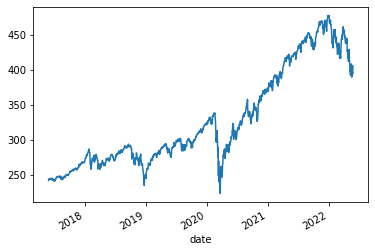

In [12]:
close_spy.plot()

### Calculamos y graficamos el Drawdown

<AxesSubplot:xlabel='date'>

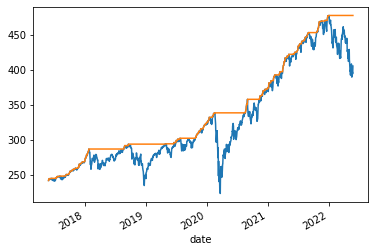

In [13]:
close_spy.plot()
close_spy.expanding().max().plot()

In [14]:
draw_down = (close_spy/close_spy.expanding().max()) - 1

<AxesSubplot:xlabel='date'>

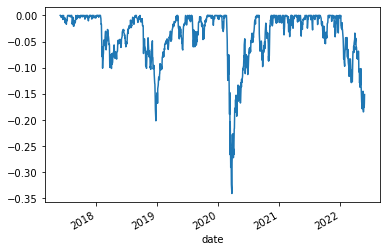

In [15]:
draw_down.plot()

### Calculamos y pintamos la distribución de los retornos

In [23]:
import seaborn as sns

In [24]:
retornos = np.log(close_spy).diff().dropna()

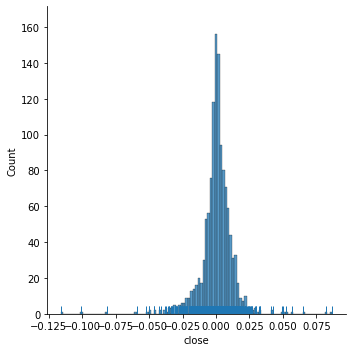

In [26]:
sns.displot(retornos, rug=True)

### Value at Risk (VaR, método histórico) and Expected Shortfall (ES)

El VaR es el valor límite de pérdida, sobre una probabilidad y un horizonte.

Por ejemplo, un VaR al 95% significa que un 5% de los retornos están por debajo de ese valor límite (del VaR).

El VaR NO es una pérdida máxima. Es un umbral, en función de una probabilidad y un horizonte temporal.

Expected Shortfall (ES): media de los retornos que están por debajo del VaR.

In [27]:
var = retornos.quantile(q=0.05)
shortfall = retornos[retornos < var].mean()

C:\Users\gmele\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gmele\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


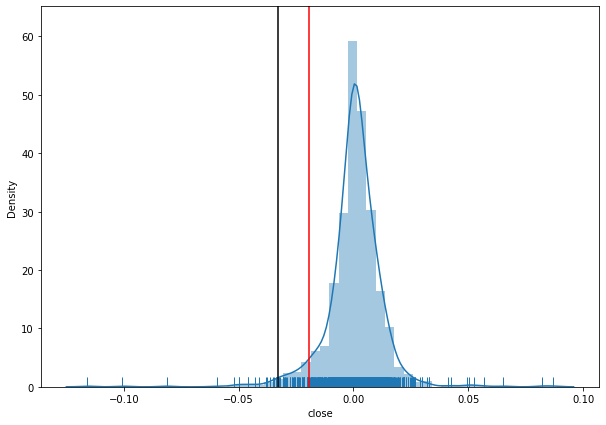

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(retornos, rug=True, ax=ax)
ax.axvline(var, color='r')
ax.axvline(shortfall, color='k')